Задача
1. Сравните результат между тестом и контролем по двум кейсам:

Примените бутстрап (с np.mean) и критерий mann-whitney, а потом сравните p-value
Примените бутстрап (с np.median) и критерий mann-whitney, а потом сравните p-value.

2. Напишите выводы, которые можно сделать на основе анализа примененных критериев

In [250]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import scipy.stats as ss
from scipy.stats import norm, mannwhitneyu
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

plt.style.use('ggplot')

In [1]:
df = pd.read_csv(r'C:\Users\Пользователь\OneDrive\Документы\Statistic_data\Lesson_9\hw_bootstrap.csv', sep=';')
df.head()

NameError: name 'pd' is not defined

In [218]:
#Проверим наличие пропущенных значений
df.isna().sum()

Unnamed: 0           0
value                0
experimentVariant    0
dtype: int64

In [219]:
#Переведем в дробное число значения колонки value
df['value'] = df.value.str.replace(',', '.')
df['value'] = df.value.astype('float')
df.head()

,Unnamed: 0,value,experimentVariant
0,1,10.380495,Control
1,2,9.546867,Control
2,3,11.088215,Control
3,4,10.147274,Control
4,5,9.789808,Control


In [220]:
#Сформируем выборку по группе control
df_control = df[df['experimentVariant'] == 'Control']
df_control.head()

,Unnamed: 0,value,experimentVariant
0,1,10.380495,Control
1,2,9.546867,Control
2,3,11.088215,Control
3,4,10.147274,Control
4,5,9.789808,Control


In [221]:
#Изучем распеределние значений в группе control
df_control_uniq = pd.Series(df_control.value.unique())
df_control_uniq.sort_values()

164     6.436541
360     7.604354
68      7.663521
150     7.883926
278     7.958207
         ...    
219    12.598569
363    12.663784
294    12.728285
195    12.817541
171    13.130346
Length: 500, dtype: float64

In [222]:
#Сформируем выборку по группе treatment
df_treatment = df[df['experimentVariant'] == 'Treatment']
df_treatment.head()

,Unnamed: 0,value,experimentVariant
500,501,10.380495,Treatment
501,502,9.546867,Treatment
502,503,11.088215,Treatment
503,504,10.147274,Treatment
504,505,9.789808,Treatment


In [223]:
#Изучим распределение значений в группе treatment
df_treatment_uniq = pd.Series(df_treatment.value.unique())
df_treatment_uniq.sort_values()

164       6.436541
360       7.604354
68        7.663521
150       7.883926
278       7.958207
          ...     
495    1000.000000
496    1200.000000
497    1500.000000
498    2000.000000
499    3000.000000
Length: 500, dtype: float64

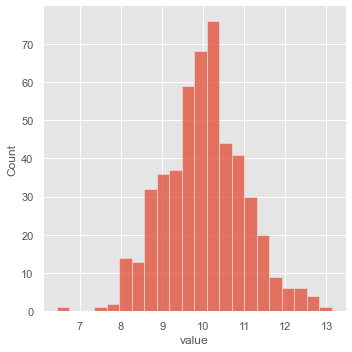

In [224]:
#Визуализируем распеределение значений по контрольной группе
sns.displot(data=df_control, x='value')

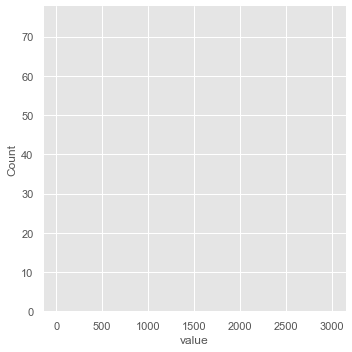

In [225]:
#Визуализируем распеределение значений по группе treatment
sns.displot(data=df_treatment, x='value')

In [226]:
#Критерий Манна-Уитни к двум группам
mannwhitneyu(df_control.value, df_treatment.value)

MannwhitneyuResult(statistic=124189.5, pvalue=0.8592148582485579)

Проведем бутстрап анализ контрольной и treatment групп по медиане и среднему значению

Проанализируем медианы групп

In [227]:
#Проведем анализ контрольной группы
boot_it = 2000
boot_data_control = []
boot_conf_level = 0.95
for i in range(boot_it):
    samples = df_control['value'].sample(len(df_control['value']), replace = True)
    boot_data_control.append(np.median(samples))

print(f'Медиана для Control group, Original: {np.median(df_control["value"])}, Boot: {np.median(boot_data_control)}')

#Проведем анализ Treatment группы
boot_it = 2000
boot_data_treatment = []
boot_conf_level = 0.95
for i in range(boot_it):
    samples = df_treatment['value'].sample(len(df_treatment['value']), replace = True)
    boot_data_treatment.append(np.median(samples))

print(f'Медиана для Treatment group, Original: {np.median(df_treatment["value"])}, Boot: {np.median(boot_data_treatment)}')


Медиана для Control group, Original: 10.0184651909296, Boot: 10.0184651909296
Медиана для Treatment group, Original: 10.02584684253515, Boot: 10.0208617676605


In [277]:
# Найдем доверительный интервал для контрольной группы
left_ci = (1 - boot_conf_level)/2
right_ci = 1 - (1 - boot_conf_level) / 2
ci_control = pd.Series(boot_data_control).quantile([left_ci, right_ci])

print('Доверительный интервал для контрольной группы \n', ci_control)

# Найдем доверительный интервал для treatment группы
left_ci = (1 - boot_conf_level)/2
right_ci = 1 - (1 - boot_conf_level) / 2
ci_treatment = pd.Series(boot_data_treatment).quantile([left_ci, right_ci])

print('Доверительный интервал для treatment группы \n', ci_treatment)

Доверительный интервал для контрольной группы 
 0.025     9.939493
0.975    10.114655
dtype: float64
Доверительный интервал для treatment группы 
 0.025    13.952128
0.975    45.264545
dtype: float64


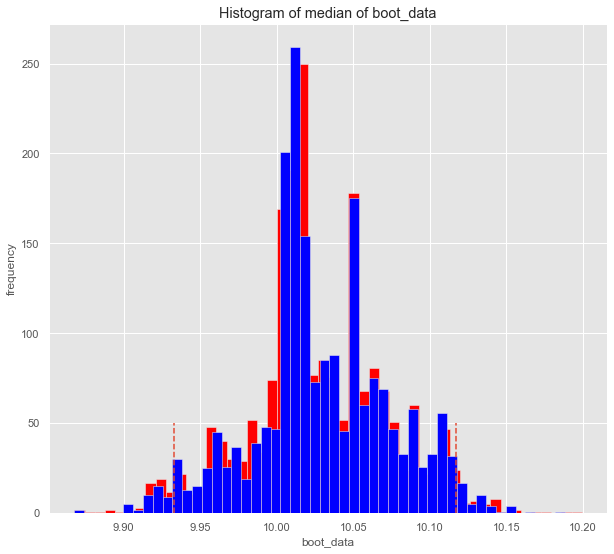

In [229]:
#Визуализируем распределеие медиан для контрольной группы
plt.hist(pd.Series(boot_data_control), bins = 50, color='red')

#Визуализируем распределеие медиан для treatment группы
plt.hist(pd.Series(boot_data_treatment), bins = 50, color='blue')
plt.style.use('ggplot')
plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
plt.xlabel('boot_data')
plt.ylabel('frequency')
plt.title("Histogram of median of boot_data")

plt.show()

In [230]:
#Критерий Манна-Уитни к двум группам
mannwhitneyu(boot_data_control, boot_data_treatment)

MannwhitneyuResult(statistic=1949794.5, pvalue=0.16918829892872922)

Проанализируем средние значения по группам

In [231]:
#Проведем анализ контрольной группы
boot_it = 2000
boot_data_control = []
boot_conf_level = 0.95
for i in range(boot_it):
    samples = df_control['value'].sample(len(df_control['value']), replace = True)
    boot_data_control.append(np.mean(samples))

print(f'Медиана для Control group, Original: {np.mean(df_control["value"])}, Boot: {np.mean(boot_data_control)}')

#Проведем анализ Treatment группы
boot_it = 2000
boot_data_treatment = []
boot_conf_level = 0.95
for i in range(boot_it):
    samples = df_treatment['value'].sample(len(df_treatment['value']), replace = True)
    boot_data_treatment.append(np.mean(samples))

print(f'Медиана для Treatment group, Original: {np.mean(df_treatment["value"])}, Boot: {np.mean(boot_data_treatment)}')

Медиана для Control group, Original: 10.0268665338043, Boot: 10.027278063022774
Медиана для Treatment group, Original: 27.321499056661583, Boot: 27.503278258371104


In [276]:
# Найдем доверительный интервал для контрольной группы
left_ci = (1 - boot_conf_level)/2
right_ci = 1 - (1 - boot_conf_level) / 2
ci_control = pd.Series(boot_data_control).quantile([left_ci, right_ci])

print('Доверительный интервал для контрольной группы \n', ci_control)

# Найдем доверительный интервал для treatment группы
left_ci = (1 - boot_conf_level)/2
right_ci = 1 - (1 - boot_conf_level) / 2
ci_treatment = pd.Series(boot_data_treatment).quantile([left_ci, right_ci])

print('Доверительный интервал для treatment группы \n', ci_treatment)

Доверительный интервал для контрольной группы 
 0.025     9.939493
0.975    10.114655
dtype: float64
Доверительный интервал для treatment группы 
 0.025    13.952128
0.975    45.264545
dtype: float64


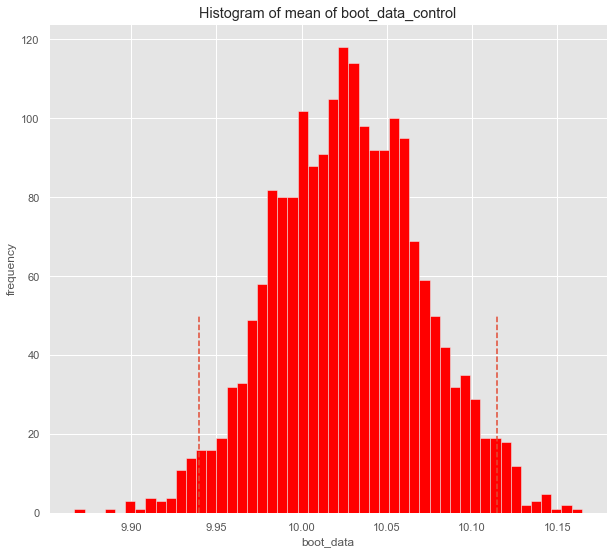

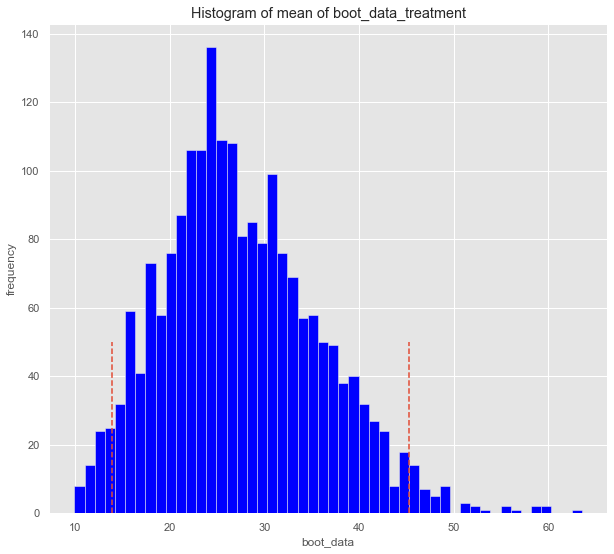

In [271]:
#Визуализируем распределеие медиан для контрольной группы
plt.hist(pd.Series(boot_data_control), bins = 50, color='red')

plt.style.use('ggplot')
plt.vlines(ci_control,ymin=0,ymax=50,linestyle='--')
plt.xlabel('boot_data')
plt.ylabel('frequency')
plt.title("Histogram of mean of boot_data_control")

plt.show()
#Визуализируем распределеие медиан для treatment группы
plt.hist(pd.Series(boot_data_treatment), bins = 50, color='blue')
plt.style.use('ggplot')
plt.vlines(ci_treatment,ymin=0,ymax=50,linestyle='--')
plt.xlabel('boot_data')
plt.ylabel('frequency')
plt.title("Histogram of mean of boot_data_treatment")

plt.show()

In [234]:
#Критерий Манна-Уитни к двум группам
mannwhitneyu(boot_data_control, boot_data_treatment)

MannwhitneyuResult(statistic=6903.0, pvalue=0.0)

In [272]:
#Среднее значение бутстрап анализ

In [235]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    df_control, # числовые значения первой выборки
    df_treatment, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(df_control), len(df_treatment)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = df_control.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = df_treatment.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

  0%|          | 0/2000 [00:00<?, ?it/s]

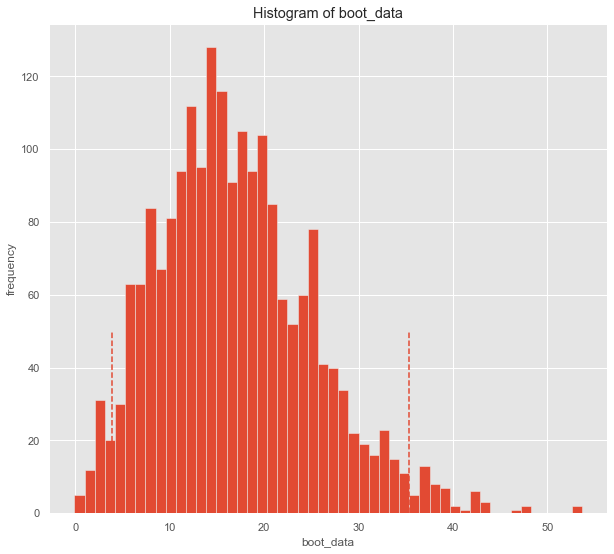

In [236]:
booted_data = get_bootstrap(df_treatment.value, df_control.value, boot_it = 2000) # в результате хранится разница двух распределений, ДИ и pvalue

In [237]:
booted_data["p_value"]

0.037309029828026134

In [238]:
booted_data["ci"]

,0
0.025,3.908625
0.975,35.346023


сравните p-value

In [239]:
#Медиана бутстрап анализ

In [240]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    df_control, # числовые значения первой выборки
    df_treatment, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(df_control), len(df_treatment)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = df_control.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = df_treatment.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # median() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.median(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.median(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

  0%|          | 0/2000 [00:00<?, ?it/s]

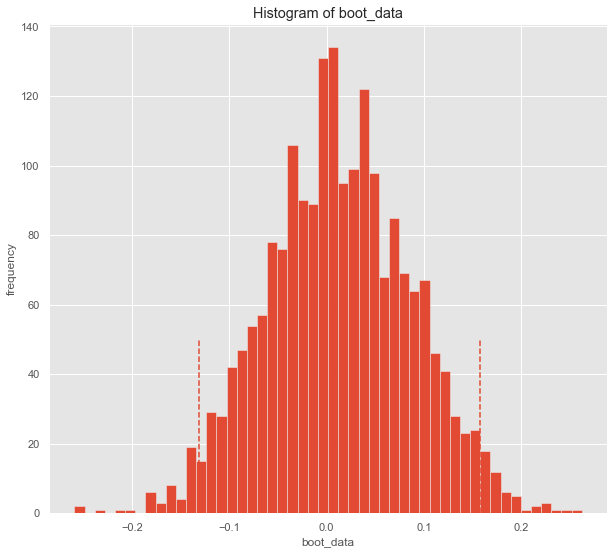

In [241]:
booted_data = get_bootstrap(df_treatment.value, df_control.value, boot_it = 2000) # в результате хранится разница двух распределений, ДИ и pvalue

In [242]:
booted_data["p_value"]

0.8947756664274013

In [243]:
booted_data["ci"]

,0
0.025,-0.131164
0.975,0.157770


***ЗАКЛЮЧЕНИЕ***

***Предварительный анализ данных:***

Пропущенных значений в данных нет. Каждая группа (control и treatment) содержит 500 значений.

В группе control выбросов в данных не обнаружено, в группе treatmen имелись выбросы, ряд значений на 3 порядка отличался от значений, которые представлены в данных.

При сравнении групп по критерию Манна-Уитни Н0 подтверждается, значимых различий нет (pvalue=0.86)

***Оценка выборок по средним значениям (mean)***

***Критерий Манна-Уитни***
Для среднего значения (mean) pvalue=0.0, соответственно мы должны бы были отвергнуть Н0, что значимых различий среднего значения между группами нет и принять Н1, что есть занчимые различия среднего значения в группах.

Применение метода ***бутстрап*** показало pvaluе=0.037, в оответствии с которым Н0 должна быть отвергнута, однако, на графике 0 не попадает в доверительный интервал, поэтому Н0 на заданном уровне занчимости не принимается.

Оба теста показали, что ***различия есть***

***Оценка выборок по медиане (median)***

***Критерий Манна-Уитни***
Для медианы (median) pvalue=0.17, соответственно мы должны бы были принять Н0, что нет значимых различий между медианным значением в группах.

Применение метода ***бутстрап*** показало pvaluе=0.89, в оответствии с которым Н0 должна быть принята, что подтверждается граыфиком, на котором 0 попадает в доверительный интервал, поэтому Н0 на заданном уровне занчимости принимается.

Оба теста показали, что ***различий нет***

Противоречивые выводы для среднего и медианного значений объясняются выбросами в данных для группы treatment, что было установлено на основании проведенного предварительного анализа данных.

Среднее значение менее устойчиво к выбросам в данных чем медиана, т.к. рассчитывается путем деления суммы всех чисел в наборе данных на количество чисел, т.е. одно или два крайних значения могут сильно изменить среднее значение. 

Медиана более надежна (менее чувствительна к выбросам в данных), чем среднее значение.

Для принятия решения необходим анализ аномальных данных (выбросов) в группе tretment, и в случае оправданности их исключения из выборки, проведение повторного анализа по критерию Манна-Уитни и бутстрап анализа.